<a href="https://colab.research.google.com/github/NateLeMonnier/university-student-habit-analyzer/blob/main/ModuleAssignment2_NathanLeMonnier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 Exploratory Data Analysis

Nathan LeMonnier <br>
Professor Kogan <br>
DS 2500 <br>
29 February 2024

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
from scipy.stats import pearsonr, norm, probplot, t, stats, chi2_contingency

# 1. Formulate your questions



# Question:
As smoking habits in college students change, are there music genres that are more popular? Less popular?

# 2. Read in your data



In [ ]:
responses_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/refs/heads/main/Module_Assignment-2/College-student-interests/responses.csv')
responses_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


First, I change the dataframe to only contain variables that are relevant to the question.

In [ ]:
genres = responses_df.columns[1:19]
smoker = responses_df['Smoking']

relevant_df = responses_df[genres]
relevant_df.insert(0, 'Smoking', smoker)
relevant_df.head(25)

,Smoking,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,never smoked,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,never smoked,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,tried smoking,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,former smoker,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,tried smoking,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0
5,never smoked,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0
6,tried smoking,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0
7,current smoker,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0
8,tried smoking,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0
9,never smoked,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0


## Imputation

Before I do anything else with the dataset, I make sure to impute values into all of the cells with missing data. I aim to fill each missing cell with the mode value from its respective variable. Below, I find how many missing cells are in each variable to decide the best imputation method.

In [ ]:
for column in relevant_df.columns[1:]:
  print (column, relevant_df[column].isnull().sum() , ' at indexes: ', relevant_df[relevant_df[column].isnull()].index.tolist())

Slow songs or fast songs 2  at indexes:  [458, 831]
Dance 4  at indexes:  [63, 338, 376, 776]
Folk 5  at indexes:  [176, 338, 378, 756, 899]
Country 5  at indexes:  [124, 288, 338, 744, 950]
Classical music 7  at indexes:  [91, 103, 167, 226, 643, 756, 887]
Musical 2  at indexes:  [858, 875]
Pop 3  at indexes:  [144, 369, 663]
Rock 6  at indexes:  [22, 164, 424, 441, 868, 943]
Metal or Hardrock 3  at indexes:  [201, 487, 608]
Punk 8  at indexes:  [63, 76, 308, 487, 508, 527, 895, 999]
Hiphop, Rap 4  at indexes:  [113, 294, 487, 987]
Reggae, Ska 7  at indexes:  [283, 424, 487, 687, 746, 925, 940]
Swing, Jazz 6  at indexes:  [347, 362, 484, 487, 524, 918]
Rock n roll 7  at indexes:  [47, 226, 487, 556, 696, 814, 918]
Alternative 7  at indexes:  [8, 402, 429, 479, 487, 509, 534]
Latino 8  at indexes:  [226, 289, 330, 512, 562, 571, 744, 745]
Techno, Trance 7  at indexes:  [146, 368, 375, 718, 738, 744, 988]
Opera 1  at indexes:  [107]


#### Why not just delete the null rows?

Using the method that Professor Kogan showed us in class, I sought to see the amount of data I would be losing if I simply deleted rows with missing values.

In [ ]:
response_nas_dropped_df = relevant_df.dropna()
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(response_nas_dropped_df),
                                                                                     len(relevant_df)))

There are 926 rows of data after dropping, compared to 1,010 before.


If I deleted rows with missing values, I would be losing almost a tenth of my data. This is a significant amount of lost data and would surely sway the results of any conclusions I find in the data.

From this knowledge, I know that it is necessary to use an imputation method.

However, any row without a response for 'Smoking' is not relevant to my question, and I will delete it.

In [ ]:
drop_df = relevant_df.dropna(subset=['Smoking'])
drop_df.reset_index(inplace=True, drop=True)
drop_df.shape

(1002, 19)

### Imputation Method
In the context of a questionnaire given to college students, I figured that any empty cells are likely due to the student not having an opinion about the genre. I chose to impute the most common response for students in the same 'Smoking' category as them. By this, I mean the Likert scale number that is the most common response for its respective category. For example, if the index 'never smoked' for variable 'Country' is 4.0 most often, any empty values would be set to 4.0.

Finding the most common value, or the 'mode', is more difficult than finding the average. Instead of being able to use aggfunc=mode, I had to come up with a different solution. While it is definitely not the prettiest and could surely be improved, I came up with it myself.

I created a dictionary to hold the 'Smoking' value as key, and a series containing the mode value for each variable in 'value'. I then created a dataframe object from the dictionary with the index set to the keys, and the columns set to the values.

In [ ]:
ind_df = drop_df.set_index('Smoking')
cursmokmode = ind_df.loc['current smoker'].mode().loc[0]
formsmokmode = ind_df.loc['former smoker'].mode().loc[0]
nevsmokmode = ind_df.loc['never smoked'].mode().loc[0]
triedsmokmode = ind_df.loc['tried smoking'].mode().loc[0]
mode_dict = {'current smoker': cursmokmode, 'former smoker': formsmokmode, 'never smoked': nevsmokmode, 'tried smoking': triedsmokmode}
mode_df = pd.DataFrame(mode_dict).transpose() # Idea from W3 schools "Pandas DataFrame transpose() Method"
mode_df

,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
current smoker,3.0,3.0,2.0,2.0,2.0,2.0,4.0,5.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0
former smoker,3.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0
never smoked,3.0,3.0,3.0,2.0,2.0,3.0,5.0,5.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0
tried smoking,3.0,3.0,2.0,2.0,3.0,3.0,4.0,5.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0


I then set the name of the index to 'Smoking', the original column that contained the values now used as the index.

In [ ]:
mode_df.index.name = 'Smoking'
mode_df.head()

,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
Smoking,,,,,,,,,,,,,,,,,,
current smoker,3.0,3.0,2.0,2.0,2.0,2.0,4.0,5.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0
former smoker,3.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0
never smoked,3.0,3.0,3.0,2.0,2.0,3.0,5.0,5.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0
tried smoking,3.0,3.0,2.0,2.0,3.0,3.0,4.0,5.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0


After all of that work, I melt the dataframe to present the mode data in a much simpler format that improves accesibility.

In [ ]:
# The mode value of each variable column in new dataframe object.
mode_responses = mode_df.melt(ignore_index=False, var_name='Genre', value_name='Mode')
mode_responses.reset_index(inplace=True)
mode_responses.set_index(['Smoking', 'Genre'], inplace=True)
print (mode_responses.loc[('current smoker', 'Slow songs or fast songs'), 'Mode'])
mode_responses.head()

3.0


,,Mode
Smoking,Genre,
current smoker,Slow songs or fast songs,3.0
former smoker,Slow songs or fast songs,3.0
never smoked,Slow songs or fast songs,3.0
tried smoking,Slow songs or fast songs,3.0
current smoker,Dance,3.0


Using my new melted dataframe, I use a nested for loop to examine each value in the original dataframe. If any cell is empty, I impute the mode value from its 'Smoking' value and variable.

In [ ]:
imp_df = drop_df.copy() # I don't want to modify drop_df
for column in imp_df.columns[1:]:
  for row in range(len(imp_df)):
    if pd.isnull(imp_df.loc[row, column]):
      imp_df.loc[row, column] = mode_responses.loc[(imp_df.loc[row][0], column), 'Mode'] # any cell with a null value will be replaced by the mode value
imp_df.iloc[63]

<ipython-input-11-c899ef2ccdae>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imp_df.loc[row, column] = mode_responses.loc[(imp_df.loc[row][0], column), 'Mode'] # any cell with a null value will be replaced by the mode value
<ipython-input-11-c899ef2ccdae>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imp_df.loc[row, column] = mode_responses.loc[(imp_df.loc[row][0], column), 'Mode'] # any cell with a null value will be replaced by the mode value
<ipython-input-11-c899ef2ccdae>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

,63
Smoking,tried smoking
Slow songs or fast songs,4.0
Dance,3.0
Folk,1.0
Country,3.0
Classical music,2.0
Musical,1.0
Pop,2.0
Rock,3.0
Metal or Hardrock,1.0


After all of that work, I can finally check to make sure I imputed values into all of the null cells.

In [ ]:
imp_df.isnull().sum()

,0
Smoking,0
Slow songs or fast songs,0
Dance,0
Folk,0
Country,0
Classical music,0
Musical,0
Pop,0
Rock,0
Metal or Hardrock,0


Finally, after all of that (admittedly convoluted) work, I can go through with the EDA process.

# 3. Check the packaging

In [ ]:
imp_df.shape

(1002, 19)

# 4. Look at the top and bottom of data

In [ ]:
imp_df.head()

,Smoking,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,never smoked,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,never smoked,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,tried smoking,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,former smoker,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,tried smoking,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


In [ ]:
imp_df.tail()

,Smoking,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
997,current smoker,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0
998,never smoked,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,1.0
999,tried smoking,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0
1000,tried smoking,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,2.0,3.0,2.0,5.0,2.0,2.0,1.0
1001,tried smoking,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,2.0,2.0,3.0,1.0


# 5. Check the "n"s

Look at the landmark values to validate the data. In this case, I examined the responses for 'Hiphop, Rap' and 'Reggae, Ska'

In [ ]:
print (imp_df['Hiphop, Rap'].value_counts().sum()) # Should be 1002
imp_df['Hiphop, Rap'].value_counts()

1002


,count
"Hiphop, Rap",
4.0,228
1.0,209
2.0,206
3.0,203
5.0,156


In [ ]:
print (imp_df['Reggae, Ska'].value_counts().sum()) # Should be 1002
imp_df['Reggae, Ska'].value_counts()

1002


,count
"Reggae, Ska",
3.0,286
2.0,252
4.0,194
1.0,178
5.0,92


There should be exactly 1002 responses for each of those variables.

In [ ]:
print ('Hiphop, Rap:', len(imp_df['Hiphop, Rap'].dropna()))
print ('Reggae, Ska:', len(imp_df['Reggae, Ska'].dropna()))

Hiphop, Rap: 1002
Reggae, Ska: 1002


# 6. Validate against an external knowledge or data source

To validate my data, I decided to examine the value counts for a variety of the genres in my data. After talking to the TA's in help hours, I learned that simply asking myself "Does this seem reasonable?" is a sufficient way to validate the data.

In [ ]:
print (imp_df['Country'].value_counts())
print (imp_df['Pop'].value_counts())
print (imp_df['Hiphop, Rap'].value_counts())

Country
2.0    348
1.0    339
3.0    197
4.0     85
5.0     33
Name: count, dtype: int64
Pop
4.0    313
3.0    257
5.0    219
2.0    154
1.0     59
Name: count, dtype: int64
Hiphop, Rap
4.0    228
1.0    209
2.0    206
3.0    203
5.0    156
Name: count, dtype: int64


The most common responses for 'Pop' (which I expect to be high) were 4, 3, and 5. This aligns with what I was expecting.

The most common responses for 'Country' (which I expect to be low) were 2, 1, and 3. This aligns with what I expecting.

The responses for Hiphop, Rap do not align with what I was expecting. However, I am thinking from the perspective of my fellow college students in the United States. As this survey had height in centimeters, it can be reasoned that it was not in the United States, which could potentially change the popularity of Hiphop and Rap.

# 7. Make a plot

While ideally, I would examine differences for every music genre, limiting the genre that I plot is important in maintaining visual apperance. For example, with all 18 genres, a line plot would have 18 lines. For this reason, I chose to narrow my genres down to the seven most relevant (or most popular genres).

Based on the "Top 10 Most Popular Music Genres" from the Novecore blog, I chose: Pop, Rock, Hiphop/Rap, Dance, Country, Reggae, and Alternative. I made sure to keep the 'Smoking' column to be used in my plot and statistical tests.

To improve the appearance in any plots, I made sure to rename any confusing variables.

In [ ]:
small_df = imp_df.copy()
small_df = small_df[['Smoking','Pop', 'Rock', 'Hiphop, Rap', 'Dance', 'Country', 'Reggae, Ska', 'Alternative']]
small_df.rename(columns={'Hiphop, Rap' : 'Rap', 'Reggae, Ska': 'Reggae'}, inplace=True)
print (small_df.shape)
small_df.head()

(1002, 8)


,Smoking,Pop,Rock,Rap,Dance,Country,Reggae,Alternative
0,never smoked,5.0,5.0,1.0,2.0,2.0,1.0,1.0
1,never smoked,3.0,5.0,1.0,2.0,1.0,3.0,4.0
2,tried smoking,3.0,5.0,1.0,2.0,3.0,4.0,5.0
3,former smoker,2.0,2.0,2.0,2.0,1.0,2.0,5.0
4,tried smoking,5.0,3.0,5.0,4.0,2.0,3.0,2.0


Another small step before plotting my data, I made sure to group the data set by 'Smoking' habits in order of 'never smoked' to 'current smoker'.

In [ ]:
group_df = small_df.groupby(['Smoking']).mean()
group_df = group_df.reindex(['never smoked', 'tried smoking', 'former smoker', 'current smoker'])

<Axes: title={'center': 'Most Liked Genre by Smoking Habit'}, xlabel='Smoking'>

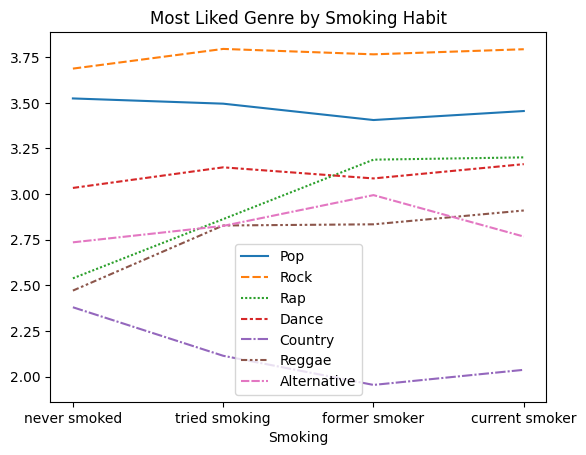

In [ ]:
plt.title('Most Liked Genre by Smoking Habit')
sb.lineplot(data=group_df)

And there we go! From the lineplot, we can see what appears to be a positive correlation between smoking habits and the genres 'Rap' and 'Reggae'. I expected 'Reggae' to increase somewhat (solely based on smoker stereotypes), but 'Rap' is surprising!

# 8. Try an easy solution




Because of the fact that I'm comparing a combination of multiple categorical variables (Genre taste and smoking habits) I used a Chi-Squared Test of Independence, which is an important test for testing two categorical variables. I found directions for developing the test both on class notebooks and jmp.com. After searching on how to easily create a contingency table, I found pandas 'crosstab' function, which creates a contins a contigency table from two different series.

## Reggae

In [ ]:
# problem setup

# The idea to use pandas 'crosstab' to create a contingency table found on Stack overflow! I did not copy any code, just utilized the concept.
regtable = pd.crosstab(small_df['Smoking'], small_df['Reggae'])
regtable = regtable.reindex(['never smoked', 'tried smoking', 'former smoker', 'current smoker'], axis='rows')
regstyled_table = regtable.style.set_caption('Smoking habits compared to Reggae')
display(regstyled_table)

# results
stat, p, dof, expected = chi2_contingency(regtable)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Reggae,1.000000,2.000000,3.000000,4.000000,5.000000
Smoking,,,,,
never smoked,53,59,54,29,13
tried smoking,64,109,130,91,36
former smoker,35,38,41,43,18
current smoker,26,46,61,31,25


Statistic: 29.395662633813178
P Value: 0.003440211329711657
Expected Frequencies
[[ 36.9500998   52.31137725  59.36926148  40.27145709  19.09780439]
 [ 76.38722555 108.14371257 122.73453094  83.25349301  39.48103792]
 [ 31.08782435  44.01197605  49.9500998   33.88223553  16.06786427]
 [ 33.5748503   47.53293413  53.94610778  36.59281437  17.35329341]]


Admittedly, I am still not the most experienced in interpreting Chi-Squared Test of Independence results. However, after reading more on jmp.com, I found that these results show that non-smokers are 1.5 times more likely to give Reggae a 1 and current-smokers are also 1.5 times more likely to give Reggae a 5 than what is expected if there was no correlation. While this implies that there is a correlation between the two categorical variables, observing the P-Value is an important step in learning if the results are statistically significant. From the P-Value, 0.0034, we can see that the test is statistically significant, meaning that there is a correlation between smoking habits and Reggae rating.

## A Few Other Genres

In [ ]:
# problem setup

# The idea to use pandas 'crosstab' to create a contingency table found on Stack overflow! I did not copy any code, just utilized the concept.
countrytable = pd.crosstab(small_df['Smoking'], small_df['Country'])
countrytable = countrytable.reindex(['never smoked', 'tried smoking', 'former smoker', 'current smoker'], axis='rows')
countrystyled_table = countrytable.style.set_caption('Smoking habits compared to Country')
display(countrystyled_table)

# results
stat, p, dof, expected = chi2_contingency(countrytable)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Country,1.000000,2.000000,3.000000,4.000000,5.000000
Smoking,,,,,
never smoked,52,72,48,25,11
tried smoking,144,150,91,33,12
former smoker,74,55,29,14,3
current smoker,69,71,29,13,7


Statistic: 22.551690523516182
P Value: 0.03178222499239783
Expected Frequencies
[[ 70.37125749  72.23952096  40.89421158  17.64471058   6.8502994 ]
 [145.47904192 149.34131737  84.54091816  36.47704591  14.16167665]
 [ 59.20658683  60.77844311  34.40618762  14.84530938   5.76347305]
 [ 63.94311377  65.64071856  37.15868263  16.03293413   6.2245509 ]]


In this country Chi-Squared test, we can again observe the P-Value is 0.03 (less than 0.05), meaning that the test is statistically significant. With this in mind, we can observe that while three out of the four groups perform around expected, college students that 'never smoked' gave Country a 5.0 almost twice as much as expected! We can also see that they gave Country a 1.0 nearly 1.4 times less than if there was no correlation.

In [ ]:
# problem setup

# The idea to use pandas 'crosstab' to create a contingency table found on Stack overflow! I did not copy any code, just utilized the concept.
raptable = pd.crosstab(small_df['Smoking'], small_df['Rap'])
raptable = raptable.reindex(['never smoked', 'tried smoking', 'former smoker', 'current smoker'], axis='rows')
rapstyled_table = raptable.style.set_caption('Smoking habits compared to Rap')
display(rapstyled_table)

# results
stat, p, dof, expected = chi2_contingency(raptable)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Rap,1.000000,2.000000,3.000000,4.000000,5.000000
Smoking,,,,,
never smoked,59,53,41,35,20
tried smoking,89,87,106,90,58
former smoker,30,32,28,45,40
current smoker,31,34,28,58,38


Statistic: 44.70226974973299
P Value: 1.1588125975154633e-05
Expected Frequencies
[[43.38522954 42.76247505 42.13972056 47.32934132 32.38323353]
 [89.69061876 88.40319361 87.11576846 97.84431138 66.94610778]
 [36.50199601 35.97804391 35.45409182 39.82035928 27.24550898]
 [39.42215569 38.85628743 38.29041916 43.00598802 29.4251497 ]]


In this Chi-Squared test, the P-Value value is 1.16e-05, meaning that the test is statistically significant. We can see that students that 'never smoked' gave Rap a 1 nearly 1.4 times more than if there had not been a relationship! We can also see that current smokers gave Rap a 5 1.3 times more than if there was not correlation. How interesting!

In [ ]:
# problem setup

# The idea to use pandas 'crosstab' to create a contingency table found on Stack overflow! I did not copy any code, just utilized the concept.
poptable = pd.crosstab(small_df['Smoking'], small_df['Pop'])
poptable = poptable.reindex(['never smoked', 'tried smoking', 'former smoker', 'current smoker'], axis='rows')
popstyled_table = poptable.style.set_caption('Smoking habits compared to Pop')
display(popstyled_table)

# results
stat, p, dof, expected = chi2_contingency(poptable)
print('Statistic: {}'.format(stat))
print('P Value: {}'.format(p))
print('Expected Frequencies')
print(expected)

Pop,1.000000,2.000000,3.000000,4.000000,5.000000
Smoking,,,,,
never smoked,12,35,51,52,58
tried smoking,23,64,114,135,94
former smoker,11,33,40,56,35
current smoker,13,22,52,70,32


Statistic: 15.53753968417649
P Value: 0.2133470975734177
Expected Frequencies
[[ 12.24750499  31.96806387  53.3493014   64.9740519   45.46107784]
 [ 25.31936128  66.08782435 110.28942116 134.32135729  93.98203593]
 [ 10.30439122  26.89620758  44.88522954  54.66566866  38.24850299]
 [ 11.12874251  29.04790419  48.4760479   59.03892216  41.30838323]]


This Chi-Squared test does not have a P-Value of less than 0.05, meaning that the test is not statistically significant. While the results show a slight correlation between not smoking and liking Pop music, the P-Value is not low enough for the test to be statistically significant and no conclusions can be drawn.

# **Write up**

## My Question
The question I chose to research with this data was, "Does music taste change in college students who are smokers? Are there genres that are more popular? Less popular?" I specifically sought to find if the genres that are both stereotypically associated with smoking and popular with my fellow students who smoke, such as Reggae.

### Why I chose my question
I found this question extremely interesting for multiple reasons. I have always heard that people who smoke enjoy Reggae "more", but have never seen any studies proving the claim. I assumed that it was most likely a baseless stereotype, but wanted to test that question using the college student dataset.

## The problems with the raw data
I expected there to be missing values in the columns that were relevant to my question ('Smoking' and all the music genres). When I examined the data, I found that about a tenth of the dataset had missing values, which was enough to perform an imputation process.

### The imputation process
Originally, I used the mean value to fill any null cells. While this was more difficult than I was expecting (as I had to find the mean value for variables based on their 'Smoking' value), it was relatively straightforward. However, after working with the TAs, I realized that using the mode made much more sense than the mean. I found that using the mode was much more difficult than using the mean. When I finally successfully implemented the mode, I had created multiple cells all performing necessary functions.

After all of my convoluted work arounds to find the mode based on 'Smoking' value, I imputed any missing cells with the correct value.

### The reshaping process
During the imputation process, I performed a variety of data reshaping processes. For example, I set indices, melted my dataframe, created a new dataframe from two others and transposed it, and created a dictionary to hold my data in the way I needed. Overall, it was a lengthy process.

### Visualization
Finding a reasonable plot that worked with my questions and the dataset was a little tricky. I originally was going to use a countplot, but eventually settled on a basic line plot, with the x-axis set to Smoking habits in order from 'never smoked' to 'current smoker'. This would function to display any correlation between smoking and Genre values.

I chose a lineplot for the fact that it easily showed correlation between the two categorical variables. From the plot, I saw that 'Rap' and 'Reggae' appeared to have a positive relation with 'Smoking' habits (people that smoke more listened to more Rap and Reggae).

### Statistical Test
Finding a functional statistical test was more difficult than finding a plot. I originally opted to use the statistical test I used in the last assignment, a Pearson Correlation Coefficient. However, I quickly realized that since both of my variables were categorical. The Pearson Correlation Coefficient relies on normal distribution, which my variables inherently were not.

From this fact, I discovered that a prominent test for categorical variables is a Chi-Square Test of Independence. Figuring out what a Chi-Square Test of Independence was and showed was difficult. However, after finding jmp.org (which had all the information I needed), I successfully used a Chi-Square Test to show a correlation between smoking habits and music taste! My findings showed that for Reggae and Rap, there was a correlation between smoking more and liking the genres more. For example, a current smoker was 1.3 times more likely to enjoy Rap than if there had been no correlation, while someone that did not smoke was almost twice as likely to give Country a 5 than if there had been no correlation.

## Applicability and Usefulness of Categorical Variables That Discretize Continuous Data

### Usefulness and Limitations in the College Responses Dataset
Categorical variables in the college responses dataset transforms continuous (and extremely hard to measure) data of how much a student likes certain things to an easy to understand and measurable Likart scale value. This is extremely useful as it allows a data scientist (me) to interpret student opinion on certain concepts and things in a way that is measurable and can be used to find conclusions. For example, if students were allowed to describe how much they liked certain things in words, there would be no structure between different students and the data would not be a number. Even if I provided numbers based on the responses, different students would not be on the same scale. Using a Likart scale eliminates this problem and allows me to easily work with student preferences.

However, there are some limitations as well. For example, the distance between certain Likart values ('love' to 'like') are not necessarily the same for all responses. For example, is the distance from 'tolerate' to 'like' the same as 'like' to 'love'? This is an inherent issue when assigning a categorical variable to a continuous variable.

### Usefulness and Limitations in Another Data-Driven Problem
One example of another data-driven problem that uses categorical variables to discretize a continuous variable is the effect of BMI on health factors such as diabetes and high-blood pressure. BMI is a continuous variable, just like weight. By providing certain ranges that transform the continuous BMI data into a categorical variable, the problem becomes much more possible to solve.

The usefulness of using a categorical variable to discretize a continuous variable such as BMI is clear. Instead of having thousands and thousands (realistically infinite) different BMI measurements, having a range holds each continuous variable to a number that can actually be used to answer the question. This can then be utilized to examine any correlation between weight and health effects. I do not think that it would have been nearly as possible to demonstrate that higher BMI leads to increased blood sugar and diabetes without the act of using a categorical variable to discretize the continuous variable (BMI).

The limitations of the BMI ranges is potentially categorizing someone into a field that they do not best fit in. For example, if someone is slightly over the average weight, they might be classified as 'overweight', in the same categories of a range of other people that might be much more 'overweight'. While it is nice to be able to have a distinct measurement, it can potentially group individuals in a section that does not best reflect them.